In [11]:
import numpy as np
import pandas as pd
import owlready2 as owl
import networkx as nx
import matplotlib.pyplot as plt

In [12]:
table = pd.read_csv("./Data/vartest.tsv", sep='\t')
table2 = table.iloc[:, [0,1,2,3,6,8,22,24,25,26,40]].sort_values("Pathogenicity Score", ascending=False).loc[table["Pathogenicity Score"] >= 15]

In [13]:
hpo2diag = pd.read_csv("./Data/maxo_diagnostic_annotations2.txt", sep='\t')

In [14]:
gene2phen = pd.read_csv("./Data/genes_to_phenotype.txt", sep='\t')
gene2phen2 = gene2phen[gene2phen["gene_symbol"].isin(table2["Gene Symbol"])]

In [15]:
#### Find Unique Entries
##
gene2phen2sg = gene2phen2.drop_duplicates(subset=["gene_symbol"])
# print(gene2phen2sg.iloc[0]["gene_symbol"])

##
gene2phen2sp = gene2phen2.drop_duplicates(subset=["hpo_id"])
# print(gene2phen2sg.iloc[0]["hpo_id"])

## Show Relations
# for index, entry in gene2phen2.iterrows():
#     print(entry["gene_symbol"], entry["hpo_id"])

In [16]:
hpo2diags = hpo2diag.drop_duplicates(subset=["maxo_label"])

In [17]:
onto = owl.get_ontology("http://test.org/onto.owl")

with onto:
    
    class Gene(owl.Thing):
        pass
    class Phenotype(owl.Thing):
        pass
    class Measure(owl.Thing):
        pass
    class Diagnostic(Measure):
        pass
    
    class ConnectedTo(owl.Thing >> owl.Thing):
        pass

    
    for gene in gene2phen2sg["gene_symbol"]:
        my_new_gene = Gene(gene)
        
    for phen in gene2phen2sp["hpo_id"]:
        my_new_phen = Phenotype(phen)

    for diag in hpo2diags["maxo_label"]:
        my_new_diag = Diagnostic(diag)

    ## Insert Gene to Phenotype Relations
    gene_considered = gene2phen2.iloc[0]["gene_symbol"]
    phen_list = []
    for index, entry in gene2phen2.iterrows():
        if gene_considered == entry["gene_symbol"]:
            phen_list.append(Phenotype(entry["hpo_id"]))
        elif gene_considered is not entry["gene_symbol"]:
            Gene(gene_considered).ConnectedTo = phen_list
            # print(phen_list)
            phen_list = []
            gene_considered = entry["gene_symbol"]
            phen_list.append(Phenotype(entry["hpo_id"]))
    
    ## Insert Phenotype to Diagnostics Relations   
    phen_considered = hpo2diag.iloc[0]["hpo_id"]
    diag_list = []
    for index, entry in hpo2diag.iterrows():
        if phen_considered == entry["hpo_id"]:
            diag_list.append(Diagnostic(entry["maxo_label"]))
        elif phen_considered is not entry["hpo_id"]:
            Phenotype(phen_considered).ConnectedTo = diag_list
            #print(diag_list)
            diag_list = []
            phen_considered = entry["hpo_id"]
            diag_list.append(Diagnostic(entry["maxo_label"]))

In [18]:
print(len(onto.Gene.instances()))
print(len(onto.Phenotype.instances()))
print(len(onto.Diagnostic.instances()))

#for i in onto.Gene.instances():
#    print(i, i.ConnectedTo)
    
#print(onto.Gene.instances()[1], onto.Gene.instances()[1].ConnectedTo)

#for i in onto.Phenotype.instances():
#    print(i, i.ConnectedTo)


36
16395
258


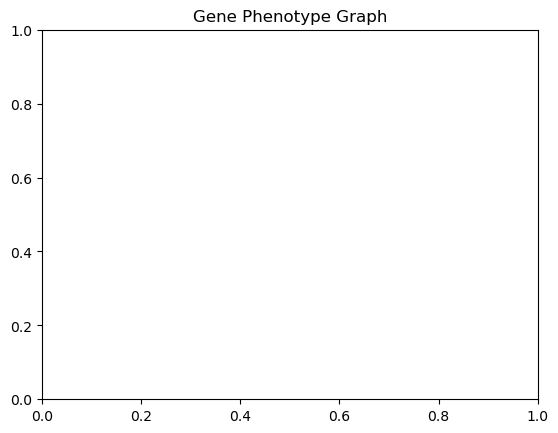

In [19]:
G = nx.DiGraph()

# 添加节点和边
for nodediag in onto.Diagnostic.instances():
    G.add_node(nodediag.name, label=nodediag.is_a[0].name)
for nodephen in onto.Phenotype.instances():
    G.add_node(nodephen.name, label=nodephen.is_a[0].name)
for nodegene in onto.Gene.instances():
    G.add_node(nodegene.name, label=nodegene.is_a[0].name)
    for genephenconnected in nodegene.ConnectedTo:
        G.add_edge(nodegene.name, genephenconnected.name)
for nodephen in onto.Phenotype.instances():
    for phendiagconnected in nodephen.ConnectedTo:
        G.add_edge(nodephen.name, phendiagconnected.name)

# 绘制网络图
#pos = nx.spring_layout(G)
#nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', width = 0.05, arrowsize = 4, node_size=8, font_size=1, font_weight='bold')

# 显示图
plt.title("Gene Phenotype Graph")
#plt.savefig("GenoPhenoKG.pdf")
plt.show()
#https://github.com/zhiyzuo/python-tutorial/blob/master/3-Network-Analysis-with-NetworkX.ipynb
#https://deepnote.com/app/siriuslabs/3D-network-visualisations-using-plotly-99361a50-d639-4371-9a7f-ff6e70184e02
# 1. for all diag_nodes build subgraph between diag_node (.subgraph(nodes=[i,onto.Diagnostic.instances()]))  and all geno_nodes, remove isolates (all geno_nodes not connected to diag_node), extract metrics from subgraph, repeat...

In [20]:
import plotly.graph_objects as go

G = nx.karate_club_graph()

In [21]:
print(G)
nx.write_gml(G, "./Data/karate.gml")

Graph named "Zachary's Karate Club" with 34 nodes and 78 edges


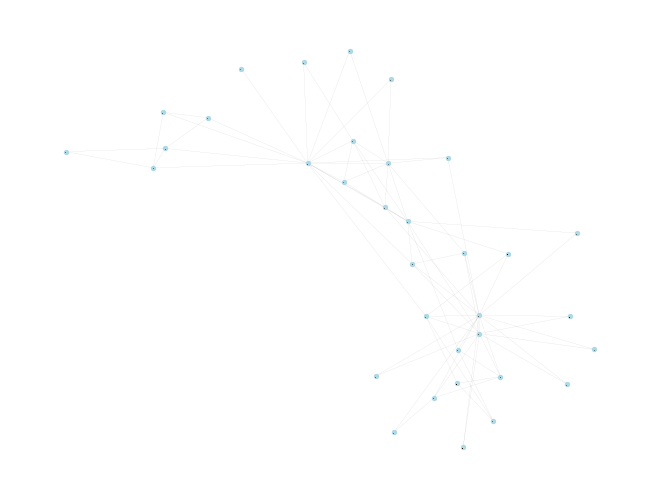

In [22]:
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', width = 0.05, node_size=8, font_size=1, font_weight='bold')
plt.show()

In [23]:
G = nx.Graph()
print(G)

Graph with 0 nodes and 0 edges


In [24]:
G.add_node(1)
print(G)

Graph with 1 nodes and 0 edges


In [25]:
G.add_nodes_from(range(2,5))
print(G)

Graph with 4 nodes and 0 edges


In [26]:
G.add_edge(1,2)
print(G)

Graph with 4 nodes and 1 edges


In [27]:
G.add_edge(19,20)
print(G)

Graph with 6 nodes and 2 edges


In [28]:
G.add_edges_from([(2,3), (1,4)])
print(G)

Graph with 6 nodes and 4 edges


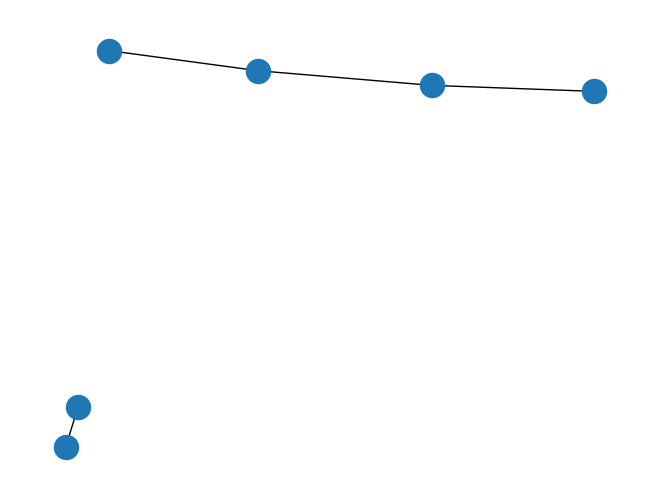

In [29]:
pos = nx.spring_layout(G)
nx.draw(G, pos)
plt.show()

In [30]:
G.nodes()

NodeView((1, 2, 3, 4, 19, 20))

In [31]:
G.edges()

EdgeView([(1, 2), (1, 4), (2, 3), (19, 20)])

In [32]:
G.degree()

DegreeView({1: 2, 2: 2, 3: 1, 4: 1, 19: 1, 20: 1})

In [33]:
karate = nx.karate_club_graph()
print(karate)

Graph named "Zachary's Karate Club" with 34 nodes and 78 edges


In [34]:
n = karate.number_of_nodes()
p = 2.*karate.number_of_edges()/(n*(n-1))
print(n,p)

34 0.13903743315508021


In [35]:
nx.density(karate)

0.13903743315508021

In [36]:
erdos_rg =nx.erdos_renyi_graph(n,p, seed= np.random.randint(10))
print(erdos_rg)

Graph with 34 nodes and 79 edges


<BarContainer object of 34 artists>

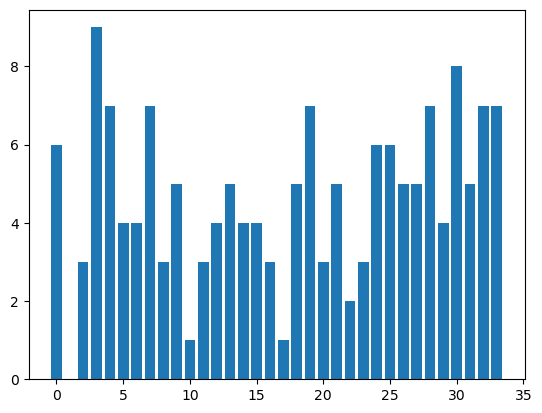

In [37]:
degr = dict(erdos_rg.degree())
plt.bar(degr.keys(), degr.values())

In [38]:
degr = dict(karate.degree())

In [39]:
degree_dist = np.array(list(degr.values()))

In [40]:
conf_rg = nx.configuration_model(degree_dist, seed=np.random.randint(10))

In [41]:
print(karate)

Graph named "Zachary's Karate Club" with 34 nodes and 78 edges


In [42]:
print(conf_rg)

MultiGraph with 34 nodes and 78 edges


<BarContainer object of 34 artists>

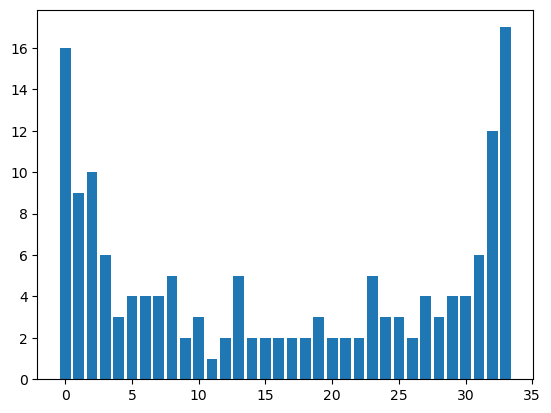

In [43]:
degr = dict(conf_rg.degree())
plt.bar(degr.keys(), degr.values())

<BarContainer object of 34 artists>

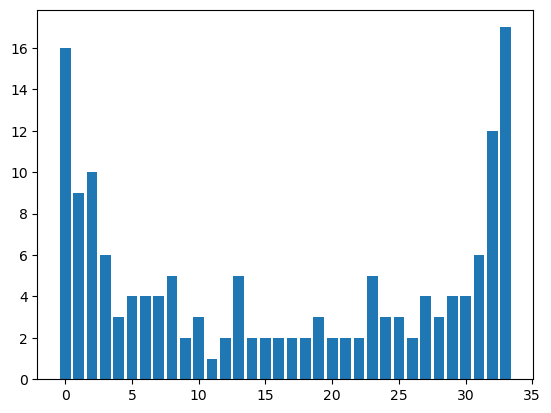

In [44]:
degr = dict(karate.degree())
plt.bar(degr.keys(), degr.values())

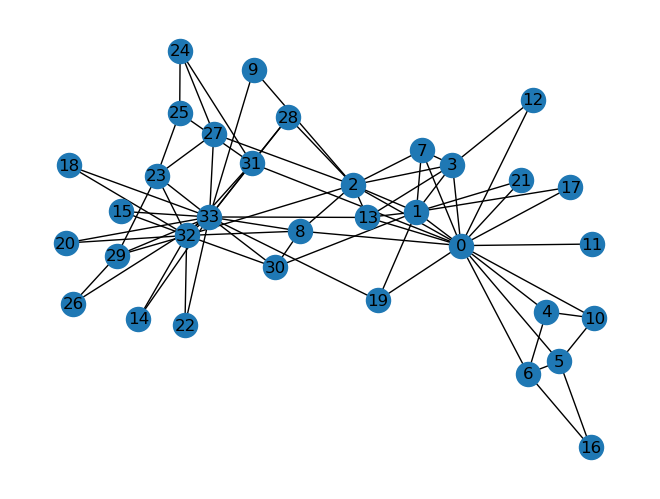

In [51]:

nx.draw(karate, with_labels=True)
plt.show()

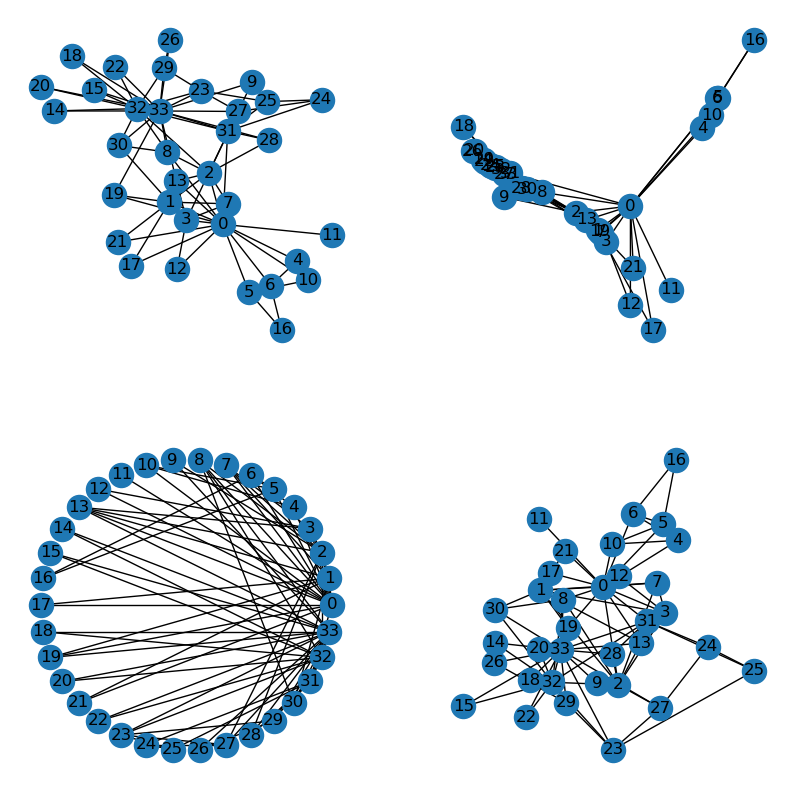

In [59]:
plt.figure(figsize=(10,10))
plt.subplot(221)
nx.draw_spring(karate, with_labels=True)
plt.subplot(222)
nx.draw_spectral(karate, with_labels=True)
plt.subplot(223)
nx.draw_circular(karate, with_labels=True)
plt.subplot(224)
nx.draw_kamada_kawai(karate, with_labels=True)
plt.show()

In [61]:
import plotly.graph_objects as go
%matplotlib inline

In [62]:
ZKC_graph = nx.karate_club_graph()
print(ZKC_graph)

Graph named "Zachary's Karate Club" with 34 nodes and 78 edges


In [66]:
spec_node1 = 0
spec_node2 = 33
num_nodes = 34
num_edges = 78
cl = nx.get_node_attributes(ZKC_graph, "club")
club_labels = list(nx.get_node_attributes(ZKC_graph, "club").values())
print(club_labels, cl)

['Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Officer', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Officer', 'Officer', 'Mr. Hi', 'Mr. Hi', 'Officer', 'Mr. Hi', 'Officer', 'Mr. Hi', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer'] {0: 'Mr. Hi', 1: 'Mr. Hi', 2: 'Mr. Hi', 3: 'Mr. Hi', 4: 'Mr. Hi', 5: 'Mr. Hi', 6: 'Mr. Hi', 7: 'Mr. Hi', 8: 'Mr. Hi', 9: 'Officer', 10: 'Mr. Hi', 11: 'Mr. Hi', 12: 'Mr. Hi', 13: 'Mr. Hi', 14: 'Officer', 15: 'Officer', 16: 'Mr. Hi', 17: 'Mr. Hi', 18: 'Officer', 19: 'Mr. Hi', 20: 'Officer', 21: 'Mr. Hi', 22: 'Officer', 23: 'Officer', 24: 'Officer', 25: 'Officer', 26: 'Officer', 27: 'Officer', 28: 'Officer', 29: 'Officer', 30: 'Officer', 31: 'Officer', 32: 'Officer', 33: 'Officer'}


In [68]:
community_0 = [8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
community_1 = [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 19, 21]

community_label = [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [69]:
spring_pos = nx.spring_layout(ZKC_graph, seed=2)

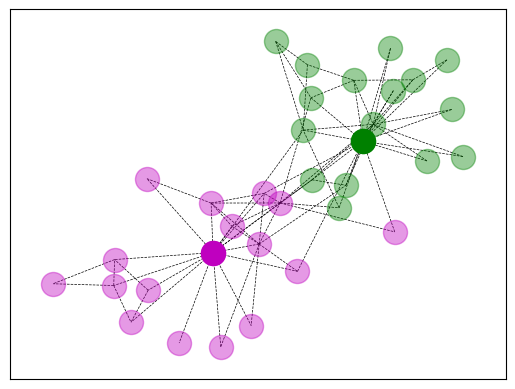

In [74]:
nx.draw_networkx_nodes(ZKC_graph, spring_pos, nodelist = community_0, node_color = "g", alpha =.4)
nx.draw_networkx_nodes(ZKC_graph, spring_pos, nodelist = community_1, node_color = "m", alpha = .4)

nx.draw_networkx_nodes(ZKC_graph, spring_pos, nodelist = [spec_node2], node_color="g", alpha=1)
nx.draw_networkx_nodes(ZKC_graph, spring_pos, nodelist = [spec_node1], node_color="m", alpha=1)

nx.draw_networkx_edges(ZKC_graph, spring_pos, style="dashed", width=.5)

plt.show()

In [84]:
spring_3D = (nx.spring_layout(ZKC_graph, dim=3, seed=18))
#print(type(spring_3D))
print(spring_3D)

{0: array([-0.21184286, -0.16882218,  0.46118399]), 1: array([-0.08910005,  0.10512366,  0.38254582]), 2: array([-0.12915931,  0.10537709,  0.05048101]), 3: array([-0.39659521,  0.07873633,  0.35331161]), 4: array([-0.25910334, -0.58293508,  0.72821969]), 5: array([-0.56290878, -0.53814847,  0.78925864]), 6: array([-0.52093941, -0.63291304,  0.6695265 ]), 7: array([-0.29285379,  0.23247177,  0.36616947]), 8: array([ 0.1196564 ,  0.08657343, -0.06744278]), 9: array([-0.05460918,  0.6460971 , -0.3200822 ]), 10: array([-0.36561208, -0.51437249,  0.93063468]), 11: array([ 0.00418851, -0.34346697,  0.91221661]), 12: array([-0.75414972,  0.11752377,  0.55076764]), 13: array([-0.06224721,  0.05545812,  0.15439132]), 14: array([ 0.64635076,  0.19299732, -0.70881754]), 15: array([ 0.37872678,  0.50686106, -0.53374546]), 16: array([-0.75444704, -0.85097127,  0.89010982]), 17: array([-0.35783913,  0.08288238,  0.91275363]), 18: array([ 0.75332489, -0.07403988, -0.61277462]), 19: array([ 0.2336830

In [80]:
x_nodes = [spring_3D[i][0] for i in range(num_nodes)]
y_nodes = [spring_3D[i][1] for i in range(num_nodes)]
z_nodes = [spring_3D[i][2] for i in range(num_nodes)]

In [83]:
edge_list = ZKC_graph.edges()

print(edge_list)

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)]


In [93]:
x_edges = []
y_edges = []
z_edges = []

for edge in edge_list:
    x_coords = [spring_3D[edge[0]][0], spring_3D[edge[1]][0], None]
    x_edges += x_coords
    
    y_coords = [spring_3D[edge[0]][1], spring_3D[edge[1]][1], None]
    y_edges += y_coords
    
    z_coords = [spring_3D[edge[0]][2], spring_3D[edge[1]][2], None]
    z_edges += z_coords
    

In [94]:
trace_edge = go.Scatter3d(x = x_edges, y = y_edges, z = z_edges, mode = "lines", line= dict(color="black", width=2), hoverinfo="none")

In [96]:
trace_nodes = go.Scatter3d(x = x_nodes, y = y_nodes, z = z_nodes, mode = "markers", marker = dict(symbol="circle",
                                                                                                  size = 10,
                                                                                                  color = community_label,
                                                                                                  colorscale = ["lightgreen", "magenta"],
                                                                                                  line= dict(color = "black", width = .5)),
                           text = club_labels, hoverinfo = "text")

In [97]:
axis = dict(showbackground=False,
            showline = False,
            zeroline = False,
            showgrid = False,
            showticklabels = False,
            title="")

In [98]:
layout = go.Layout(title = "Two predicted Factions of Karate Club",
                   width=650,
                   height=625,
                   showlegend=False,
                   scene=dict(xaxis=dict(axis),
                              yaxis=dict(axis),
                              zaxis=dict(axis)
                              ),
                   margin=dict(t=100),
                   hovermode="closest")

In [1]:
data = [trace_edge, trace_nodes]
fig = go.Figure(data = data, layout = layout)

#fig.write_html("./test.html")
fig.show()

NameError: name 'trace_edge' is not defined